## ***AVL Log In Report***  
### **Weekly report with District, Subdistrict, Management Unit (Garage) with percent logged in vs. not**  
#### June 2024 with updated columns from Parsons
#### Date: January 10, 2024  

#### Updates: January 25, 2024, March 5, 2024: made change to df4, was calculated based on df2 when it should have been df3, June 26, 2024: csv file format and column names/order changed, so needed to update notebook, Aug. 20, 2024: updated sub_lookup with 7 additional garages (units still not matching between INDOT and Parsons, but they are mapped to correct subs) and changed join to left join so un-matched units/subs will be called out in the final output

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import glob
#import os
#from pathlib import Path

### **Concatenating several .csv files, ignore_index = TRUE***

In [6]:
df1 = pd.read_csv('Log_In_1_27_25.csv')
df2 = pd.read_csv('Log_In_1_28_25.csv')
df3 = pd.read_csv('Log_In_1_29_25.csv')
df4 = pd.read_csv('Log_In_1_30_25.csv')
df5 = pd.read_csv('Log_In_1_31_25.csv')
df6 = pd.read_csv('Log_In_2_1_25.csv')
df7 = pd.read_csv('Log_In_2_2_25.csv')

In [8]:
file2 = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index = True)

In [10]:
file2

,Date,District,Garage,Truck,Operator Name,Login Time,Logoff Time,Total Hours,Total Miles
0,01/26/25 11:59 PM,Fort Wayne,Angola,64099,Unknown,01/26/25 12:00 AM,01/26/25 11:59 PM,24.0,0.0
1,01/26/25 11:59 PM,Fort Wayne,LaGrange,64226,Unknown,01/26/25 12:00 AM,01/26/25 11:59 PM,24.0,0.0
2,01/26/25 11:59 PM,Greenfield,65th St.,63102,Unknown,01/26/25 08:10 PM,01/26/25 11:59 PM,3.8,30.0
3,01/26/25 10:11 PM,Greenfield,65th St.,63266,Unknown,01/26/25 08:21 PM,01/26/25 10:11 PM,1.8,0.0
4,01/26/25 11:59 PM,Greenfield,65th St.,63266,Virgil Buckman (10000403149),01/26/25 10:12 PM,01/26/25 11:59 PM,1.8,30.0
...,...,...,...,...,...,...,...,...,...
4646,02/01/25 11:39 AM,Seymour,Brookville,65720,Tyler Noah (10000381083),02/01/25 09:14 AM,02/01/25 11:39 AM,2.4,55.0
4647,02/01/25 11:59 PM,Seymour,Penntown,65677,Unknown,02/01/25 12:00 AM,02/01/25 11:59 PM,24.0,0.0
4648,02/01/25 11:59 PM,Seymour,Sellersburg,65241,Unknown,02/01/25 11:42 PM,02/01/25 11:59 PM,0.3,0.0
4649,02/01/25 11:59 PM,Seymour,Sellersburg,65727,Unknown,02/01/25 11:47 PM,02/01/25 11:59 PM,0.2,0.0


In [12]:
#file2.drop('Unnamed: 7', inplace=True, axis=1)
#changed for updated columns 6/24

In [14]:
file2.columns

Index(['Date', 'District', 'Garage', 'Truck', 'Operator Name', 'Login Time',
       'Logoff Time', 'Total Hours', 'Total Miles'],
      dtype='object')

In [16]:
#file2 = df1

In [18]:
garage2 = pd.DataFrame(file2['Garage'].unique())

In [20]:
garage2

,0
0,Angola
1,LaGrange
2,65th St.
3,71st St.
4,Indianapolis
...,...
101,Sullivan
102,Romney
103,Fort Wayne Unit
104,Bainbridge


### **Loading Sub Lookup Table, to add column for subdistricts to data from Parsons**  
Double check number of rows of subs with columns of df below

In [23]:
sub = pd.read_csv("sub_lookup_table.csv")
sub

,Garage,Subdistrict
0,Ashboro,(1100) - TERRE HAUTE SUBDISTRICT (PS065128)
1,Bainbridge,(1500) - CLOVERDALE SUBDISTRICT (PS065132)
2,Bloomingdale,(1200) - CRAWFORDSVILLE SUBDISTRICT (PS065129)
3,Carbondale,(1300) - WEST LAFAYETTE SUBDISTRICT (PS065130)
4,Cloverdale,(1500) - CLOVERDALE SUBDISTRICT (PS065132)
...,...,...
110,Fort Wayne Unit,(2300) - FORT WAYNE SUBDISTRICT (PS065145)
111,Unit 7 Night,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158)
112,Indianapolis,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158)
113,Evansville Unit,(6300) - EVANSVILLE SUBDISTRICT (PS065207)


### **Combining data from Parsons (for several days) with Sub lookup then reordering columns**  
#### Left join so any garages in file2 are included, not just those in the sub_lookup table

In [26]:
df = file2.merge(sub, how= 'left')

In [28]:
df

,Date,District,Garage,Truck,Operator Name,Login Time,Logoff Time,Total Hours,Total Miles,Subdistrict
0,01/26/25 11:59 PM,Fort Wayne,Angola,64099,Unknown,01/26/25 12:00 AM,01/26/25 11:59 PM,24.0,0.0,(2300) - FORT WAYNE SUBDISTRICT (PS065145)
1,01/26/25 11:59 PM,Fort Wayne,LaGrange,64226,Unknown,01/26/25 12:00 AM,01/26/25 11:59 PM,24.0,0.0,(2200) - ELKHART SUBDISTRICT (PS065144)
2,01/26/25 11:59 PM,Greenfield,65th St.,63102,Unknown,01/26/25 08:10 PM,01/26/25 11:59 PM,3.8,30.0,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158)
3,01/26/25 10:11 PM,Greenfield,65th St.,63266,Unknown,01/26/25 08:21 PM,01/26/25 10:11 PM,1.8,0.0,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158)
4,01/26/25 11:59 PM,Greenfield,65th St.,63266,Virgil Buckman (10000403149),01/26/25 10:12 PM,01/26/25 11:59 PM,1.8,30.0,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158)
...,...,...,...,...,...,...,...,...,...,...
4646,02/01/25 11:39 AM,Seymour,Brookville,65720,Tyler Noah (10000381083),02/01/25 09:14 AM,02/01/25 11:39 AM,2.4,55.0,(5100) - AURORA SUBDISTRICT (PS065190)
4647,02/01/25 11:59 PM,Seymour,Penntown,65677,Unknown,02/01/25 12:00 AM,02/01/25 11:59 PM,24.0,0.0,(5100) - AURORA SUBDISTRICT (PS065190)
4648,02/01/25 11:59 PM,Seymour,Sellersburg,65241,Unknown,02/01/25 11:42 PM,02/01/25 11:59 PM,0.3,0.0,(5400) - FALLS CITY SUBDISTRICT (PS065193)
4649,02/01/25 11:59 PM,Seymour,Sellersburg,65727,Unknown,02/01/25 11:47 PM,02/01/25 11:59 PM,0.2,0.0,(5400) - FALLS CITY SUBDISTRICT (PS065193)


In [30]:
df.columns

Index(['Date', 'District', 'Garage', 'Truck', 'Operator Name', 'Login Time',
       'Logoff Time', 'Total Hours', 'Total Miles', 'Subdistrict'],
      dtype='object')

In [32]:
column_names = ['Date', 'District', 'Subdistrict', 'Garage', 'Truck', 'Operator Name', 'Total Hours',
       'Total Miles', 'Login Time', 'Logoff Time']
#changed 6/24

In [34]:
df2 = pd.DataFrame(df, columns = column_names)
df2.head(5)

,Date,District,Subdistrict,Garage,Truck,Operator Name,Total Hours,Total Miles,Login Time,Logoff Time
0,01/26/25 11:59 PM,Fort Wayne,(2300) - FORT WAYNE SUBDISTRICT (PS065145),Angola,64099,Unknown,24.0,0.0,01/26/25 12:00 AM,01/26/25 11:59 PM
1,01/26/25 11:59 PM,Fort Wayne,(2200) - ELKHART SUBDISTRICT (PS065144),LaGrange,64226,Unknown,24.0,0.0,01/26/25 12:00 AM,01/26/25 11:59 PM
2,01/26/25 11:59 PM,Greenfield,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158),65th St.,63102,Unknown,3.8,30.0,01/26/25 08:10 PM,01/26/25 11:59 PM
3,01/26/25 10:11 PM,Greenfield,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158),65th St.,63266,Unknown,1.8,0.0,01/26/25 08:21 PM,01/26/25 10:11 PM
4,01/26/25 11:59 PM,Greenfield,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158),65th St.,63266,Virgil Buckman (10000403149),1.8,30.0,01/26/25 10:12 PM,01/26/25 11:59 PM


In [36]:
df2 = df2.sort_values( by = ['District', 'Subdistrict'])

In [38]:
df2_Cr = df2[df2['District'] == 'Crawfordsville']
df2_Cr.head(3)

,Date,District,Subdistrict,Garage,Truck,Operator Name,Total Hours,Total Miles,Login Time,Logoff Time
15,01/27/25 11:17 AM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Ashboro,61201,Unknown,3.0,30.0,01/27/25 08:17 AM,01/27/25 11:17 AM
16,01/27/25 02:32 PM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Ashboro,61201,Unknown,2.5,19.0,01/27/25 12:04 PM,01/27/25 02:32 PM
17,01/27/25 10:20 AM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Ashboro,61498,Unknown,0.2,0.0,01/27/25 10:10 AM,01/27/25 10:20 AM


In [40]:
df2_Fo = df2[df2['District'] == 'Fort Wayne']
df2_Fo.head(3)

,Date,District,Subdistrict,Garage,Truck,Operator Name,Total Hours,Total Miles,Login Time,Logoff Time
1,01/26/25 11:59 PM,Fort Wayne,(2200) - ELKHART SUBDISTRICT (PS065144),LaGrange,64226,Unknown,24.0,0.0,01/26/25 12:00 AM,01/26/25 11:59 PM
151,01/27/25 08:45 AM,Fort Wayne,(2200) - ELKHART SUBDISTRICT (PS065144),Elkhart,62001,Unknown,0.3,0.0,01/27/25 08:27 AM,01/27/25 08:45 AM
152,01/27/25 11:08 AM,Fort Wayne,(2200) - ELKHART SUBDISTRICT (PS065144),Elkhart,62001,Unknown,0.2,0.0,01/27/25 10:55 AM,01/27/25 11:08 AM


In [42]:
df2_Gr = df2[df2['District'] == 'Greenfield']
df2_Gr.head(3)

,Date,District,Subdistrict,Garage,Truck,Operator Name,Total Hours,Total Miles,Login Time,Logoff Time
2,01/26/25 11:59 PM,Greenfield,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158),65th St.,63102,Unknown,3.8,30.0,01/26/25 08:10 PM,01/26/25 11:59 PM
3,01/26/25 10:11 PM,Greenfield,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158),65th St.,63266,Unknown,1.8,0.0,01/26/25 08:21 PM,01/26/25 10:11 PM
4,01/26/25 11:59 PM,Greenfield,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158),65th St.,63266,Virgil Buckman (10000403149),1.8,30.0,01/26/25 10:12 PM,01/26/25 11:59 PM


In [44]:
df2_La = df2[df2['District'] == 'LaPorte']
df2_La.head(3)

,Date,District,Subdistrict,Garage,Truck,Operator Name,Total Hours,Total Miles,Login Time,Logoff Time
11,01/26/25 11:59 PM,LaPorte,(4100) - LAPORTE SUBDISTRICT (PS065174),LaPorte,64124,Unknown,0.6,0.0,01/26/25 11:24 PM,01/26/25 11:59 PM
12,01/26/25 11:59 PM,LaPorte,(4100) - LAPORTE SUBDISTRICT (PS065174),Michigan City,64188,Unknown,0.5,0.0,01/26/25 11:26 PM,01/26/25 11:59 PM
523,01/27/25 04:28 AM,LaPorte,(4100) - LAPORTE SUBDISTRICT (PS065174),Chesterton,64005,Unknown,2.1,0.0,01/27/25 02:25 AM,01/27/25 04:28 AM


In [46]:
df2_Se = df2[df2['District'] == 'Seymour']
df2_Se.head(3)

,Date,District,Subdistrict,Garage,Truck,Operator Name,Total Hours,Total Miles,Login Time,Logoff Time
797,01/27/25 01:34 PM,Seymour,(5100) - AURORA SUBDISTRICT (PS065190),Aurora,65015,Unknown,0.4,0.0,01/27/25 01:11 PM,01/27/25 01:34 PM
798,01/27/25 07:54 AM,Seymour,(5100) - AURORA SUBDISTRICT (PS065190),Aurora,65039,Unknown,0.2,0.0,01/27/25 07:45 AM,01/27/25 07:54 AM
799,01/27/25 09:50 AM,Seymour,(5100) - AURORA SUBDISTRICT (PS065190),Aurora,65039,Unknown,1.6,0.0,01/27/25 08:16 AM,01/27/25 09:50 AM


In [48]:
df2_Vi = df2[df2['District'] == 'Vincennes']
df2_Vi.head(3)

,Date,District,Subdistrict,Garage,Truck,Operator Name,Total Hours,Total Miles,Login Time,Logoff Time
963,01/27/25 11:11 AM,Vincennes,(6100) - LINTON SUBDISTRICT (PS065205),Crane,66004,Unknown,1.1,22.0,01/27/25 10:05 AM,01/27/25 11:11 AM
964,01/27/25 02:34 PM,Vincennes,(6100) - LINTON SUBDISTRICT (PS065205),Crane,66004,Unknown,1.2,1.0,01/27/25 01:21 PM,01/27/25 02:34 PM
988,01/27/25 09:09 AM,Vincennes,(6100) - LINTON SUBDISTRICT (PS065205),Linton,66726,Unknown,1.8,13.0,01/27/25 07:23 AM,01/27/25 09:09 AM


In [50]:
dist = pd.read_csv('sub_dist_lookup_table.csv')
dist

,Subdistrict,District
0,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Crawfordsville
1,(1200) - CRAWFORDSVILLE SUBDISTRICT (PS065129),Crawfordsville
2,(1300) - WEST LAFAYETTE SUBDISTRICT (PS065130),Crawfordsville
3,(1400) - FRANKFORT SUBDISTRICT (PS065131),Crawfordsville
4,(1500) - CLOVERDALE SUBDISTRICT (PS065132),Crawfordsville
5,(2200) - ELKHART SUBDISTRICT (PS065144),Fort Wayne
6,(2300) - FORT WAYNE SUBDISTRICT (PS065145),Fort Wayne
7,(2500) - WABASH SUBDISTRICT (PS065147),Fort Wayne
8,(2600) - BLUFFTON SUBDISTRICT (PS065148),Fort Wayne
9,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158),Greenfield


### **Unknown Analysis with ALL DATA (not filtered for less than 10 miles):**

In [53]:
unknown = df2[df2["Operator Name"] == "Unknown"]
unknown
#changed 6/24

,Date,District,Subdistrict,Garage,Truck,Operator Name,Total Hours,Total Miles,Login Time,Logoff Time
15,01/27/25 11:17 AM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Ashboro,61201,Unknown,3.0,30.0,01/27/25 08:17 AM,01/27/25 11:17 AM
16,01/27/25 02:32 PM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Ashboro,61201,Unknown,2.5,19.0,01/27/25 12:04 PM,01/27/25 02:32 PM
17,01/27/25 10:20 AM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Ashboro,61498,Unknown,0.2,0.0,01/27/25 10:10 AM,01/27/25 10:20 AM
18,01/27/25 02:52 PM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Ashboro,61498,Unknown,1.8,1.0,01/27/25 01:05 PM,01/27/25 02:52 PM
33,01/27/25 11:46 AM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Fort Harrison,61090,Unknown,4.4,0.0,01/27/25 07:21 AM,01/27/25 11:46 AM
...,...,...,...,...,...,...,...,...,...,...
3736,01/31/25 12:00 PM,NaN,NaN,NaN,TESTRMA,Unknown,0.4,0.0,01/31/25 11:37 AM,01/31/25 12:00 PM
3737,01/31/25 12:28 PM,NaN,NaN,NaN,TESTRMA,Unknown,0.2,0.0,01/31/25 12:14 PM,01/31/25 12:28 PM
3738,01/31/25 01:04 PM,NaN,NaN,NaN,TESTRMA,Unknown,0.4,0.0,01/31/25 12:42 PM,01/31/25 01:04 PM
3739,01/31/25 02:10 PM,NaN,NaN,NaN,TESTRMA,Unknown,0.8,0.0,01/31/25 01:24 PM,01/31/25 02:10 PM


In [55]:
number_unknown = len(unknown.index)

In [57]:
number_unknown

4018

In [59]:
df2

,Date,District,Subdistrict,Garage,Truck,Operator Name,Total Hours,Total Miles,Login Time,Logoff Time
15,01/27/25 11:17 AM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Ashboro,61201,Unknown,3.0,30.0,01/27/25 08:17 AM,01/27/25 11:17 AM
16,01/27/25 02:32 PM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Ashboro,61201,Unknown,2.5,19.0,01/27/25 12:04 PM,01/27/25 02:32 PM
17,01/27/25 10:20 AM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Ashboro,61498,Unknown,0.2,0.0,01/27/25 10:10 AM,01/27/25 10:20 AM
18,01/27/25 02:52 PM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Ashboro,61498,Unknown,1.8,1.0,01/27/25 01:05 PM,01/27/25 02:52 PM
33,01/27/25 11:46 AM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Fort Harrison,61090,Unknown,4.4,0.0,01/27/25 07:21 AM,01/27/25 11:46 AM
...,...,...,...,...,...,...,...,...,...,...
3736,01/31/25 12:00 PM,NaN,NaN,NaN,TESTRMA,Unknown,0.4,0.0,01/31/25 11:37 AM,01/31/25 12:00 PM
3737,01/31/25 12:28 PM,NaN,NaN,NaN,TESTRMA,Unknown,0.2,0.0,01/31/25 12:14 PM,01/31/25 12:28 PM
3738,01/31/25 01:04 PM,NaN,NaN,NaN,TESTRMA,Unknown,0.4,0.0,01/31/25 12:42 PM,01/31/25 01:04 PM
3739,01/31/25 02:10 PM,NaN,NaN,NaN,TESTRMA,Unknown,0.8,0.0,01/31/25 01:24 PM,01/31/25 02:10 PM


In [61]:
n_unknown = unknown['Operator Name'].groupby(unknown.Garage).count()
n_unknown_df = pd.DataFrame(n_unknown)
n_unknown_df.rename(columns={'Operator Name':'number_unknown'}, inplace=True)
n_unknown_df['total_trucks'] = df2['Operator Name'].groupby(df2.Garage).count()
n_unknown_df['percent_unknown'] = n_unknown_df['number_unknown']/n_unknown_df['total_trucks']
n_unknown_df['percent_logged_in'] = 1 - n_unknown_df['percent_unknown']
n_unknown_df['number_logged_in'] = n_unknown_df['total_trucks'] - n_unknown_df['number_unknown']

In [63]:
n_unknown_df

,number_unknown,total_trucks,percent_unknown,percent_logged_in,number_logged_in
Garage,,,,,
65th St.,47,51,0.921569,0.078431,4
71st St.,26,26,1.000000,0.000000,0
Albany,35,35,1.000000,0.000000,0
Alexandria Unit,61,65,0.938462,0.061538,4
Amity,32,45,0.711111,0.288889,13
...,...,...,...,...,...
Warsaw,68,72,0.944444,0.055556,4
Waterloo,17,19,0.894737,0.105263,2
Westfield,21,26,0.807692,0.192308,5


In [65]:
n_unknown_df.columns

Index(['number_unknown', 'total_trucks', 'percent_unknown',
       'percent_logged_in', 'number_logged_in'],
      dtype='object')

In [67]:
column_names2 = ['number_logged_in','number_unknown', 'total_trucks',
       'percent_logged_in', 'percent_unknown']

In [69]:
unknown_df = pd.DataFrame(n_unknown_df, columns = column_names2)

In [71]:
unknown_df.reset_index()

,Garage,number_logged_in,number_unknown,total_trucks,percent_logged_in,percent_unknown
0,65th St.,4,47,51,0.078431,0.921569
1,71st St.,0,26,26,0.000000,1.000000
2,Albany,0,35,35,0.000000,1.000000
3,Alexandria Unit,4,61,65,0.061538,0.938462
4,Amity,13,32,45,0.288889,0.711111
...,...,...,...,...,...,...
100,Warsaw,4,68,72,0.055556,0.944444
101,Waterloo,2,17,19,0.105263,0.894737
102,Westfield,5,21,26,0.192308,0.807692
103,Winamac,21,127,148,0.141892,0.858108


In [73]:
unknown_df2 = unknown_df.merge(sub, how = "left", on = "Garage")

In [75]:
unknown_df2

,Garage,number_logged_in,number_unknown,total_trucks,percent_logged_in,percent_unknown,Subdistrict
0,65th St.,4,47,51,0.078431,0.921569,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158)
1,71st St.,0,26,26,0.000000,1.000000,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158)
2,Albany,0,35,35,0.000000,1.000000,(3600) - ALBANY SUBDISTRICT (PS065163)
3,Alexandria Unit,4,61,65,0.061538,0.938462,(3600) - ALBANY SUBDISTRICT (PS065163)
4,Amity,13,32,45,0.288889,0.711111,(5300) - COLUMBUS SUBDISTRICT (PS065192)
...,...,...,...,...,...,...,...
100,Warsaw,4,68,72,0.055556,0.944444,(2200) - ELKHART SUBDISTRICT (PS065144)
101,Waterloo,2,17,19,0.105263,0.894737,(2300) - FORT WAYNE SUBDISTRICT (PS065145)
102,Westfield,5,21,26,0.192308,0.807692,(3500) - TIPTON SUBDISTRICT (PS065162)
103,Winamac,21,127,148,0.141892,0.858108,(4200) - MONTICELLO SUBDISTRICT (PS065175)


In [77]:
unknown_df2 = unknown_df2.merge(dist, how = "left", on = "Subdistrict")
unknown_df2

,Garage,number_logged_in,number_unknown,total_trucks,percent_logged_in,percent_unknown,Subdistrict,District
0,65th St.,4,47,51,0.078431,0.921569,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158),Greenfield
1,71st St.,0,26,26,0.000000,1.000000,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158),Greenfield
2,Albany,0,35,35,0.000000,1.000000,(3600) - ALBANY SUBDISTRICT (PS065163),Greenfield
3,Alexandria Unit,4,61,65,0.061538,0.938462,(3600) - ALBANY SUBDISTRICT (PS065163),Greenfield
4,Amity,13,32,45,0.288889,0.711111,(5300) - COLUMBUS SUBDISTRICT (PS065192),Seymour
...,...,...,...,...,...,...,...,...
100,Warsaw,4,68,72,0.055556,0.944444,(2200) - ELKHART SUBDISTRICT (PS065144),Fort Wayne
101,Waterloo,2,17,19,0.105263,0.894737,(2300) - FORT WAYNE SUBDISTRICT (PS065145),Fort Wayne
102,Westfield,5,21,26,0.192308,0.807692,(3500) - TIPTON SUBDISTRICT (PS065162),Greenfield
103,Winamac,21,127,148,0.141892,0.858108,(4200) - MONTICELLO SUBDISTRICT (PS065175),LaPorte


In [79]:
column_names3 = ['District','Subdistrict','Garage', 'number_logged_in', 'number_unknown', 'total_trucks',
       'percent_logged_in', 'percent_unknown']

In [81]:
unknown_df3 = pd.DataFrame(unknown_df2, columns = column_names3)

In [83]:
unknown_df3 = unknown_df3.sort_values( by = ['Subdistrict', 'Garage'])
#Subdistrict and Garage breakdown

In [85]:
unknown_df3


,District,Subdistrict,Garage,number_logged_in,number_unknown,total_trucks,percent_logged_in,percent_unknown
7,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Ashboro,1,28,29,0.034483,0.965517
34,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Fort Harrison,3,24,27,0.111111,0.888889
90,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Terre Haute,1,19,20,0.050000,0.950000
12,Crawfordsville,(1200) - CRAWFORDSVILLE SUBDISTRICT (PS065129),Bloomingdale,8,41,49,0.163265,0.836735
27,Crawfordsville,(1200) - CRAWFORDSVILLE SUBDISTRICT (PS065129),Crawfordsville,1,42,43,0.023256,0.976744
...,...,...,...,...,...,...,...,...
30,Vincennes,(6500) - TELL CITY SUBDISTRICT (PS065209),Derby,2,19,21,0.095238,0.904762
57,Vincennes,(6600) - VINCENNES SUBDISTRICT (PS065210),Loogootee,0,30,30,0.000000,1.000000
72,Vincennes,(6600) - VINCENNES SUBDISTRICT (PS065210),Oakland City,0,13,13,0.000000,1.000000
96,Vincennes,(6600) - VINCENNES SUBDISTRICT (PS065210),Vincennes,1,30,31,0.032258,0.967742


## **Same analysis but remove rows with less than 10 miles**

In [88]:
#df2['Total Miles'] = pd.to_numeric(df2['Total Miles'])

In [90]:
df3 = df2.drop(df2[df2['Total Miles'] <= 10].index)

In [92]:
df3 = df3.sort_values( by = ['District', 'Subdistrict'])

In [94]:
df3

,Date,District,Subdistrict,Garage,Truck,Operator Name,Total Hours,Total Miles,Login Time,Logoff Time
15,01/27/25 11:17 AM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Ashboro,61201,Unknown,3.0,30.0,01/27/25 08:17 AM,01/27/25 11:17 AM
16,01/27/25 02:32 PM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Ashboro,61201,Unknown,2.5,19.0,01/27/25 12:04 PM,01/27/25 02:32 PM
34,01/27/25 11:52 AM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Fort Harrison,61203,Unknown,4.2,16.0,01/27/25 07:41 AM,01/27/25 11:52 AM
37,01/27/25 12:53 PM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Fort Harrison,61997,Unknown,5.1,18.0,01/27/25 07:45 AM,01/27/25 12:53 PM
1015,01/28/25 02:56 PM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Ashboro,61201,Unknown,6.9,67.0,01/28/25 08:03 AM,01/28/25 02:56 PM
...,...,...,...,...,...,...,...,...,...,...
3728,01/30/25 07:06 AM,Vincennes,(6600) - VINCENNES SUBDISTRICT (PS065210),Vincennes,66732,Unknown,2.4,74.0,01/30/25 04:43 AM,01/30/25 07:06 AM
3730,01/30/25 09:14 AM,Vincennes,(6600) - VINCENNES SUBDISTRICT (PS065210),Vincennes,66825,Unknown,1.9,73.0,01/30/25 07:21 AM,01/30/25 09:14 AM
4548,01/31/25 08:47 AM,Vincennes,(6600) - VINCENNES SUBDISTRICT (PS065210),Loogootee,66489,Unknown,1.0,37.0,01/31/25 07:50 AM,01/31/25 08:47 AM
4549,01/31/25 10:31 AM,Vincennes,(6600) - VINCENNES SUBDISTRICT (PS065210),Loogootee,66489,Unknown,1.2,37.0,01/31/25 09:18 AM,01/31/25 10:31 AM


In [96]:
unknown2 = df3[df3["Operator Name"] == "Unknown"]
unknown2
#changed 6/24

,Date,District,Subdistrict,Garage,Truck,Operator Name,Total Hours,Total Miles,Login Time,Logoff Time
15,01/27/25 11:17 AM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Ashboro,61201,Unknown,3.0,30.0,01/27/25 08:17 AM,01/27/25 11:17 AM
16,01/27/25 02:32 PM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Ashboro,61201,Unknown,2.5,19.0,01/27/25 12:04 PM,01/27/25 02:32 PM
34,01/27/25 11:52 AM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Fort Harrison,61203,Unknown,4.2,16.0,01/27/25 07:41 AM,01/27/25 11:52 AM
37,01/27/25 12:53 PM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Fort Harrison,61997,Unknown,5.1,18.0,01/27/25 07:45 AM,01/27/25 12:53 PM
1015,01/28/25 02:56 PM,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Ashboro,61201,Unknown,6.9,67.0,01/28/25 08:03 AM,01/28/25 02:56 PM
...,...,...,...,...,...,...,...,...,...,...
3728,01/30/25 07:06 AM,Vincennes,(6600) - VINCENNES SUBDISTRICT (PS065210),Vincennes,66732,Unknown,2.4,74.0,01/30/25 04:43 AM,01/30/25 07:06 AM
3730,01/30/25 09:14 AM,Vincennes,(6600) - VINCENNES SUBDISTRICT (PS065210),Vincennes,66825,Unknown,1.9,73.0,01/30/25 07:21 AM,01/30/25 09:14 AM
4548,01/31/25 08:47 AM,Vincennes,(6600) - VINCENNES SUBDISTRICT (PS065210),Loogootee,66489,Unknown,1.0,37.0,01/31/25 07:50 AM,01/31/25 08:47 AM
4549,01/31/25 10:31 AM,Vincennes,(6600) - VINCENNES SUBDISTRICT (PS065210),Loogootee,66489,Unknown,1.2,37.0,01/31/25 09:18 AM,01/31/25 10:31 AM


In [98]:
#unknown2

In [100]:
#create df with number and percent unknown operators
n_unknown2 = unknown2['Operator Name'].groupby(unknown2.Garage).count()
df4 = pd.DataFrame(n_unknown2)
df4.rename(columns={'Operator Name':'number_unknown'}, inplace=True)
df4['total_trucks'] = df3['Operator Name'].groupby(df3.Garage).count()
df4['percent_unknown'] = df4['number_unknown']/df4['total_trucks']
df4['percent_logged_in'] = 1 - df4['percent_unknown']
df4['number_logged_in'] = df4['total_trucks'] - df4['number_unknown']

#### Next, reorder columns, reset index, then merge with sub df

In [103]:
column_names4 = ['number_logged_in','number_unknown', 'total_trucks',
       'percent_logged_in', 'percent_unknown']

In [105]:
unknown_df4 = pd.DataFrame(df4, columns = column_names4)
unknown_df4.reset_index()

,Garage,number_logged_in,number_unknown,total_trucks,percent_logged_in,percent_unknown
0,65th St.,4,14,18,0.222222,0.777778
1,71st St.,0,8,8,0.000000,1.000000
2,Albany,0,2,2,0.000000,1.000000
3,Alexandria Unit,3,8,11,0.272727,0.727273
4,Amity,12,7,19,0.631579,0.368421
...,...,...,...,...,...,...
88,Warsaw,0,1,1,0.000000,1.000000
89,Waterloo,0,6,6,0.000000,1.000000
90,Westfield,5,2,7,0.714286,0.285714
91,Winamac,18,21,39,0.461538,0.538462


In [107]:
unknown_df5 = unknown_df4.merge(sub, how = "left", on = "Garage")

In [109]:
unknown_df5 = unknown_df5.merge(dist, how = "left", on = "Subdistrict")
unknown_df5

,Garage,number_logged_in,number_unknown,total_trucks,percent_logged_in,percent_unknown,Subdistrict,District
0,65th St.,4,14,18,0.222222,0.777778,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158),Greenfield
1,71st St.,0,8,8,0.000000,1.000000,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158),Greenfield
2,Albany,0,2,2,0.000000,1.000000,(3600) - ALBANY SUBDISTRICT (PS065163),Greenfield
3,Alexandria Unit,3,8,11,0.272727,0.727273,(3600) - ALBANY SUBDISTRICT (PS065163),Greenfield
4,Amity,12,7,19,0.631579,0.368421,(5300) - COLUMBUS SUBDISTRICT (PS065192),Seymour
...,...,...,...,...,...,...,...,...
88,Warsaw,0,1,1,0.000000,1.000000,(2200) - ELKHART SUBDISTRICT (PS065144),Fort Wayne
89,Waterloo,0,6,6,0.000000,1.000000,(2300) - FORT WAYNE SUBDISTRICT (PS065145),Fort Wayne
90,Westfield,5,2,7,0.714286,0.285714,(3500) - TIPTON SUBDISTRICT (PS065162),Greenfield
91,Winamac,18,21,39,0.461538,0.538462,(4200) - MONTICELLO SUBDISTRICT (PS065175),LaPorte


### reorder columns again, then sort by sub and garage (and District!1 which was added 9/30/24)

In [112]:
unknown_df5.columns

Index(['Garage', 'number_logged_in', 'number_unknown', 'total_trucks',
       'percent_logged_in', 'percent_unknown', 'Subdistrict', 'District'],
      dtype='object')

In [114]:
column_names5 = ['District','Subdistrict', 'Garage', 'number_logged_in', 'number_unknown', 'total_trucks',
       'percent_logged_in', 'percent_unknown']
unknown_df6 = pd.DataFrame(unknown_df5, columns = column_names5)

In [116]:
unknown_df6 = unknown_df6.sort_values( by = ['Subdistrict', 'Garage'])

In [118]:
unknown_df6

,District,Subdistrict,Garage,number_logged_in,number_unknown,total_trucks,percent_logged_in,percent_unknown
7,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Ashboro,1,7,8,0.125000,0.875000
30,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Fort Harrison,2,8,10,0.200000,0.800000
79,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Terre Haute,0,1,1,0.000000,1.000000
62,Crawfordsville,(1200) - CRAWFORDSVILLE SUBDISTRICT (PS065129),Newport,0,3,3,0.000000,1.000000
83,Crawfordsville,(1200) - CRAWFORDSVILLE SUBDISTRICT (PS065129),Veedersburg,0,1,1,0.000000,1.000000
...,...,...,...,...,...,...,...,...
27,Vincennes,(6500) - TELL CITY SUBDISTRICT (PS065209),Dale,0,7,7,0.000000,1.000000
28,Vincennes,(6500) - TELL CITY SUBDISTRICT (PS065209),Derby,2,4,6,0.333333,0.666667
49,Vincennes,(6600) - VINCENNES SUBDISTRICT (PS065210),Loogootee,0,5,5,0.000000,1.000000
64,Vincennes,(6600) - VINCENNES SUBDISTRICT (PS065210),Oakland City,0,5,5,0.000000,1.000000


In [120]:
unknown_df_Cr = unknown_df6[unknown_df6['District'] == 'Crawfordsville']
unknown_df_Cr

,District,Subdistrict,Garage,number_logged_in,number_unknown,total_trucks,percent_logged_in,percent_unknown
7,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Ashboro,1,7,8,0.125000,0.875000
30,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Fort Harrison,2,8,10,0.200000,0.800000
79,Crawfordsville,(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Terre Haute,0,1,1,0.000000,1.000000
62,Crawfordsville,(1200) - CRAWFORDSVILLE SUBDISTRICT (PS065129),Newport,0,3,3,0.000000,1.000000
83,Crawfordsville,(1200) - CRAWFORDSVILLE SUBDISTRICT (PS065129),Veedersburg,0,1,1,0.000000,1.000000
17,Crawfordsville,(1300) - WEST LAFAYETTE SUBDISTRICT (PS065130),Carbondale,0,1,1,0.000000,1.000000
33,Crawfordsville,(1300) - WEST LAFAYETTE SUBDISTRICT (PS065130),Fowler,1,4,5,0.200000,0.800000
45,Crawfordsville,(1300) - WEST LAFAYETTE SUBDISTRICT (PS065130),Lafayette,2,8,10,0.200000,0.800000
34,Crawfordsville,(1400) - FRANKFORT SUBDISTRICT (PS065131),Frankfort,5,7,12,0.416667,0.583333
46,Crawfordsville,(1400) - FRANKFORT SUBDISTRICT (PS065131),Lebanon,3,3,6,0.500000,0.500000


In [122]:
unknown_df_Fo = unknown_df6[unknown_df6['District'] == 'Fort Wayne']
unknown_df_Fo

,District,Subdistrict,Garage,number_logged_in,number_unknown,total_trucks,percent_logged_in,percent_unknown
43,Fort Wayne,(2200) - ELKHART SUBDISTRICT (PS065144),LaGrange,12,1,13,0.923077,0.076923
88,Fort Wayne,(2200) - ELKHART SUBDISTRICT (PS065144),Warsaw,0,1,1,0.000000,1.000000
6,Fort Wayne,(2300) - FORT WAYNE SUBDISTRICT (PS065145),Angola,6,8,14,0.428571,0.571429
31,Fort Wayne,(2300) - FORT WAYNE SUBDISTRICT (PS065145),Fort Wayne,20,18,38,0.526316,0.473684
61,Fort Wayne,(2300) - FORT WAYNE SUBDISTRICT (PS065145),New Haven,0,12,12,0.000000,1.000000
89,Fort Wayne,(2300) - FORT WAYNE SUBDISTRICT (PS065145),Waterloo,0,6,6,0.000000,1.000000
22,Fort Wayne,(2500) - WABASH SUBDISTRICT (PS065147),Columbia City,0,1,1,0.000000,1.000000
86,Fort Wayne,(2500) - WABASH SUBDISTRICT (PS065147),Wabash,0,1,1,0.000000,1.000000
13,Fort Wayne,(2600) - BLUFFTON SUBDISTRICT (PS065148),Bluffton,1,8,9,0.111111,0.888889
37,Fort Wayne,(2600) - BLUFFTON SUBDISTRICT (PS065148),Gas City,3,12,15,0.200000,0.800000


In [124]:
unknown_df_Gr = unknown_df6[unknown_df6['District'] == 'Greenfield']
unknown_df_Gr

,District,Subdistrict,Garage,number_logged_in,number_unknown,total_trucks,percent_logged_in,percent_unknown
0,Greenfield,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158),65th St.,4,14,18,0.222222,0.777778
1,Greenfield,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158),71st St.,0,8,8,0.000000,1.000000
40,Greenfield,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158),Indianapolis,3,11,14,0.214286,0.785714
51,Greenfield,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158),Madison St.,2,21,23,0.086957,0.913043
80,Greenfield,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158),Tibbs Unit,5,5,10,0.500000,0.500000
82,Greenfield,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158),Unit 7 Night,8,21,29,0.275862,0.724138
5,Greenfield,(3200) - GREENFIELD SUBDISTRICT (PS065159),Anderson,5,7,12,0.416667,0.583333
38,Greenfield,(3200) - GREENFIELD SUBDISTRICT (PS065159),Greenfield,24,14,38,0.631579,0.368421
78,Greenfield,(3200) - GREENFIELD SUBDISTRICT (PS065159),Shelbyville,10,4,14,0.714286,0.285714
16,Greenfield,(3300) - CAMBRIDGE CITY SUBDISTRICT (PS065160),Cambridge City,0,1,1,0.000000,1.000000


In [126]:
unknown_df_La = unknown_df6[unknown_df6['District'] == 'LaPorte']
unknown_df_La

,District,Subdistrict,Garage,number_logged_in,number_unknown,total_trucks,percent_logged_in,percent_unknown
19,LaPorte,(4100) - LAPORTE SUBDISTRICT (PS065174),Chesterton,8,8,16,0.500000,0.500000
44,LaPorte,(4100) - LAPORTE SUBDISTRICT (PS065174),LaPorte,4,3,7,0.571429,0.428571
54,LaPorte,(4100) - LAPORTE SUBDISTRICT (PS065174),Michigan City,9,6,15,0.600000,0.400000
87,LaPorte,(4100) - LAPORTE SUBDISTRICT (PS065174),Wanatah,7,5,12,0.583333,0.416667
58,LaPorte,(4200) - MONTICELLO SUBDISTRICT (PS065175),Monticello,8,10,18,0.444444,0.555556
91,LaPorte,(4200) - MONTICELLO SUBDISTRICT (PS065175),Winamac,18,21,39,0.461538,0.538462
56,LaPorte,(4300) - PLYMOUTH SUBDISTRICT (PS065176),Mishawaka,2,6,8,0.250000,0.750000
68,LaPorte,(4300) - PLYMOUTH SUBDISTRICT (PS065176),Plymouth,7,11,18,0.388889,0.611111
73,LaPorte,(4300) - PLYMOUTH SUBDISTRICT (PS065176),Rochester,18,2,20,0.900000,0.100000
53,LaPorte,(4400) - RENSSELAER SUBDISTRICT (PS065177),Medaryville,5,5,10,0.500000,0.500000


In [128]:
unknown_df_Se = unknown_df6[unknown_df6['District'] == 'Seymour']
unknown_df_Se

,District,Subdistrict,Garage,number_logged_in,number_unknown,total_trucks,percent_logged_in,percent_unknown
8,Seymour,(5100) - AURORA SUBDISTRICT (PS065190),Aurora,10,7,17,0.588235,0.411765
14,Seymour,(5100) - AURORA SUBDISTRICT (PS065190),Brookville,3,2,5,0.600000,0.400000
66,Seymour,(5100) - AURORA SUBDISTRICT (PS065190),Penntown,2,15,17,0.117647,0.882353
84,Seymour,(5100) - AURORA SUBDISTRICT (PS065190),Versailles,15,13,28,0.535714,0.464286
12,Seymour,(5200) - BLOOMINGTON SUBDISTRICT (PS065191),Bloomington,10,18,28,0.357143,0.642857
15,Seymour,(5200) - BLOOMINGTON SUBDISTRICT (PS065191),Brownstown,6,18,24,0.250000,0.750000
52,Seymour,(5200) - BLOOMINGTON SUBDISTRICT (PS065191),Martinsville,6,18,24,0.250000,0.750000
4,Seymour,(5300) - COLUMBUS SUBDISTRICT (PS065192),Amity,12,7,19,0.631579,0.368421
23,Seymour,(5300) - COLUMBUS SUBDISTRICT (PS065192),Columbus,2,9,11,0.181818,0.818182
39,Seymour,(5300) - COLUMBUS SUBDISTRICT (PS065192),Greensburg,12,3,15,0.800000,0.200000


In [130]:
unknown_df_Vi = unknown_df6[unknown_df6['District'] == 'Vincennes']
unknown_df_Vi

,District,Subdistrict,Garage,number_logged_in,number_unknown,total_trucks,percent_logged_in,percent_unknown
25,Vincennes,(6100) - LINTON SUBDISTRICT (PS065205),Crane,0,3,3,0.000000,1.000000
47,Vincennes,(6100) - LINTON SUBDISTRICT (PS065205),Linton,4,4,8,0.500000,0.500000
18,Vincennes,(6300) - EVANSVILLE SUBDISTRICT (PS065207),Chandler,3,4,7,0.428571,0.571429
29,Vincennes,(6300) - EVANSVILLE SUBDISTRICT (PS065207),Evansville Unit,3,9,12,0.250000,0.750000
70,Vincennes,(6300) - EVANSVILLE SUBDISTRICT (PS065207),Poseyville,0,7,7,0.000000,1.000000
10,Vincennes,(6400) - PAOLI SUBDISTRICT (PS065208),Bedford,2,2,4,0.500000,0.500000
41,Vincennes,(6400) - PAOLI SUBDISTRICT (PS065208),Jasper,0,11,11,0.000000,1.000000
65,Vincennes,(6400) - PAOLI SUBDISTRICT (PS065208),Paoli,1,2,3,0.333333,0.666667
11,Vincennes,(6500) - TELL CITY SUBDISTRICT (PS065209),Birdseye,1,8,9,0.111111,0.888889
20,Vincennes,(6500) - TELL CITY SUBDISTRICT (PS065209),Chrisney,0,14,14,0.000000,1.000000


## **Plots:**

In [133]:
unknown_df3_plot = unknown_df3[['Subdistrict','Garage','percent_unknown']]
unknown_df3_plot = unknown_df3_plot.set_index('Subdistrict')

In [135]:
unknown_df3_plot

,Garage,percent_unknown
Subdistrict,,
(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Ashboro,0.965517
(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Fort Harrison,0.888889
(1100) - TERRE HAUTE SUBDISTRICT (PS065128),Terre Haute,0.950000
(1200) - CRAWFORDSVILLE SUBDISTRICT (PS065129),Bloomingdale,0.836735
(1200) - CRAWFORDSVILLE SUBDISTRICT (PS065129),Crawfordsville,0.976744
...,...,...
(6500) - TELL CITY SUBDISTRICT (PS065209),Derby,0.904762
(6600) - VINCENNES SUBDISTRICT (PS065210),Loogootee,1.000000
(6600) - VINCENNES SUBDISTRICT (PS065210),Oakland City,1.000000


Text(0.5, 0, '')

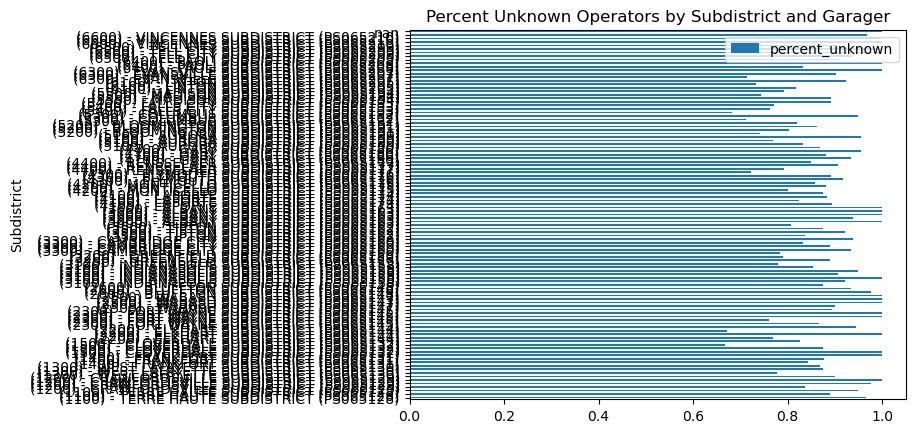

In [137]:
unknown_df3_plot.plot.barh()
plt.title('Percent Unknown Operators by Subdistrict and Garager')
plt.xlabel('')

## **Save dfs to Excel file**

In [139]:
unknown_df3.sample(3)

,District,Subdistrict,Garage,number_logged_in,number_unknown,total_trucks,percent_logged_in,percent_unknown
46,Greenfield,(3100) - INDIANAPOLIS SUBDISTRICT (PS065158),Indianapolis,7,68,75,0.093333,0.906667
18,Crawfordsville,(1300) - WEST LAFAYETTE SUBDISTRICT (PS065130),Carbondale,2,7,9,0.222222,0.777778
21,Vincennes,(6500) - TELL CITY SUBDISTRICT (PS065209),Chrisney,0,25,25,0.000000,1.000000


In [141]:
with pd.ExcelWriter('Operators_Logged_In_02_03_25_Indiana.xlsx') as writer:
    df2.to_excel(writer, sheet_name = 'All Data for Week')
    unknown_df3.to_excel(writer, sheet_name = '# Unknown All Data')
    df3.to_excel(writer, sheet_name = 'Data More than 10 Miles')
    unknown_df6.to_excel(writer, sheet_name = '# Unknown > 10 Miles')

In [145]:
#df2.to_excel("03_08_2024_All_Log_Ins_with_subs.xlsx")

### Crawfordsville Excel File

In [143]:
with pd.ExcelWriter('Craw_Operators_Logged_In_02_03_25.xlsx') as writer:
    df2_Cr.to_excel(writer, sheet_name = 'All Data for Week')
    unknown_df_Cr.to_excel(writer, sheet_name = '# Unknown > 10 Miles')

### Fort Wayne Excel File

In [146]:
with pd.ExcelWriter('Fort_Operators_Logged_In_02_03_25.xlsx') as writer:
    df2_Fo.to_excel(writer, sheet_name = 'All Data for Week')
    unknown_df_Fo.to_excel(writer, sheet_name = '# Unknown > 10 Miles')

### Greenfield Excel File

In [149]:
with pd.ExcelWriter('Gree_Operators_Logged_In_02_03_25.xlsx') as writer:
    df2_Gr.to_excel(writer, sheet_name = 'All Data for Week')
    unknown_df_Gr.to_excel(writer, sheet_name = '# Unknown > 10 Miles')

### LaPorte Excel File

In [152]:
with pd.ExcelWriter('Lapo_Operators_Logged_In_02_03_25.xlsx') as writer:
    df2_La.to_excel(writer, sheet_name = 'All Data for Week')
    unknown_df_La.to_excel(writer, sheet_name = '# Unknown > 10 Miles')

### Seymour Excel File

In [155]:
with pd.ExcelWriter('Seym_Operators_Logged_In_02_03_25.xlsx') as writer:
    df2_Se.to_excel(writer, sheet_name = 'All Data for Week')
    unknown_df_Se.to_excel(writer, sheet_name = '# Unknown > 10 Miles')

### Vincennes Excel File

In [158]:
with pd.ExcelWriter('Vinc_Operators_Logged_02_03_25.xlsx') as writer:
    df2_Vi.to_excel(writer, sheet_name = 'All Data for Week')
    unknown_df_Vi.to_excel(writer, sheet_name = '# Unknown > 10 Miles')